In [73]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

sig_file = "SIG.csv"
bkg_file = "BKG.csv"
sig_file_rand_seed = "sig1600randseed.csv"

#change the variable list to control the features to input 

In [74]:
variable = ["lepton_pt","pt_leading_jets","pt_second_jets","num_jet","Met1","Met0","MT","dR_lep_jet","eta_lepton","phi_lepton","eta_leading_jet","phi_leading_jet","eta_subleading_jet","phi_subleading_jet","phi_met"]
#variable = ["MT","lepton_pt","Met0"]
v= ["lepton_pt","pt_leading_jets","pt_second_jets","num_jet","Met1","Met0","MT","dR_lep_jet","eta_lepton","phi_lepton","eta_leading_jet","phi_leading_jet","eta_subleading_jet","phi_subleading_jet","phi_met","signal"]

In [3]:
df_sig = pd.read_csv(sig_file,index_col=0)
df_bkg = pd.read_csv(bkg_file,index_col=0)

In [4]:
#tagging signal
df_sig["signal"] = 1
df_sig

,lepton_pt,pt_leading_jets,pt_second_jets,num_jet,Met1,Met0,MT,dR_lep_jet,eta_lepton,phi_lepton,eta_leading_jet,phi_leading_jet,eta_subleading_jet,phi_subleading_jet,phi_met,signal
0,155571.640446,264347.718750,171882.031250,9,85688.845223,89612.253290,367687.003315,2.319517,1.980646,3.030379,1.040891,0.909761,0.570044,0.954224,-2.803261,1
1,33612.378985,100239.015625,88870.468750,6,269051.427575,270618.629181,305953.846438,0.861727,-0.338341,-1.856187,-1.053172,-1.374949,-3.158291,0.163562,2.163911,1
2,42228.708950,84746.828125,23791.550781,2,116466.723167,89622.950812,132534.247229,2.973352,0.217914,-0.595616,0.936859,2.289508,0.944120,1.224262,-1.026317,1
3,157497.256551,182742.437500,122542.773438,4,356797.957782,210910.662755,473517.499210,3.602300,-1.490378,1.380362,0.404580,-1.683247,-0.953130,-2.496962,0.867417,1
4,26838.180105,34571.761719,33075.222656,2,30888.436562,49370.548429,99935.474949,4.703913,-1.599838,0.080326,2.356516,-2.464091,-2.189360,2.236362,-2.536441,1
5,365.960442,132859.046875,104524.851562,5,45309.511391,46731.355729,47318.222845,1.648450,-1.033526,-2.415525,-2.554741,-1.780472,-0.469611,2.046433,1.364909,1
6,58657.854567,162715.375000,34840.820312,6,201625.026702,224194.300932,287719.547124,2.165509,-0.455590,-1.767530,1.131747,3.042635,-2.010181,1.301355,0.258902,1
7,37999.111722,150498.062500,43968.792969,5,149922.097964,149435.518586,211359.605894,2.525300,1.219297,1.427728,1.030165,-2.337250,1.689070,-0.734659,0.924038,1
8,60830.444676,84993.250000,53780.476562,5,44106.225895,45411.844804,120915.407467,4.101553,1.049602,2.333414,-1.604631,-0.793532,-1.423932,-3.086570,0.608971,1
9,20173.451558,816241.687500,489365.906250,12,348026.476500,363169.534161,385100.787366,1.603915,-0.426122,1.553844,0.241479,0.095470,1.234678,2.698847,-0.933278,1


In [5]:
df_bkg["signal"]= 0
df_bkg


,lepton_pt,pt_leading_jets,pt_second_jets,num_jet,Met1,Met0,MT,dR_lep_jet,eta_lepton,phi_lepton,eta_leading_jet,phi_leading_jet,eta_subleading_jet,phi_subleading_jet,phi_met,signal
0,60432.759206,60601.593750,35012.183594,4,125903.457423,80650.155730,141414.125451,2.809222,0.138424,2.575995,0.809325,-0.979257,2.152482,-1.665547,1.606551,0
1,36174.190718,78055.875000,68556.820312,4,30351.888964,11138.107907,69061.524658,2.359713,2.099155,2.862712,1.674436,-1.099298,-0.169612,1.381267,0.840477,0
2,1639.017018,409132.375000,184498.703125,7,265786.036678,262507.486415,264648.712446,2.629901,0.764821,-2.402875,0.261729,0.178458,0.853000,3.106226,-2.808512,0
3,80571.552972,168935.281250,131370.796875,5,5918.115923,2736.829681,83778.214639,0.706218,-0.588149,2.201624,-0.402201,1.520327,0.393786,-1.805985,-0.820854,0
4,114977.920099,156084.062500,111515.210937,9,32721.686475,31730.719436,178217.368155,3.103014,-1.523502,-1.039730,-1.028119,2.023487,-0.810579,-1.243947,-0.569189,0
5,6726.094162,76264.484375,71742.820312,7,113542.927779,101448.067016,139907.724084,3.119226,2.599949,-0.910471,1.197561,1.875723,1.219648,-2.781755,-0.279342,0
6,74073.895915,69880.156250,61326.863281,5,65091.023357,24368.822529,99382.421393,2.481959,0.319539,-0.594181,2.800939,-0.646851,-0.323564,2.271464,-2.484182,0
7,46896.545221,84908.687500,58438.609375,5,88826.290506,72000.502309,125849.968635,2.532117,0.695786,1.133810,-0.223051,-1.225714,-0.742163,-2.755496,0.398404,0
8,50060.002820,63340.738281,46718.589844,8,16789.074588,15714.489978,69620.425532,2.683369,0.792675,2.920075,-1.225331,-1.594461,-2.352653,-0.972231,-0.298547,0
9,27264.855398,71384.203125,49560.046875,5,56828.723546,68268.045580,130817.520893,1.969819,1.812815,-1.664398,0.385511,-3.021967,3.001531,2.950523,0.529640,0


lepton_pt


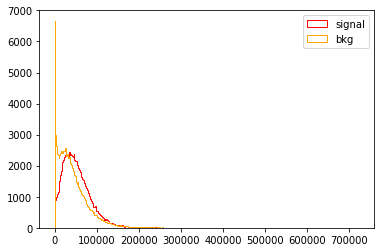

pt_leading_jets


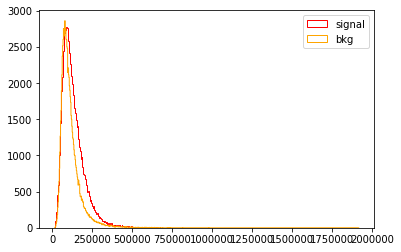

pt_second_jets


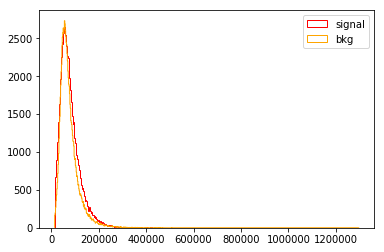

num_jet


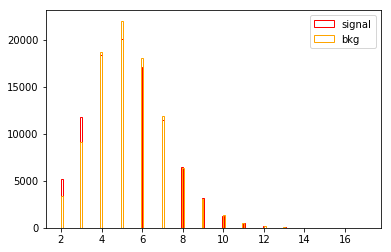

Met1


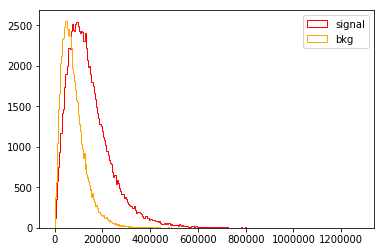

Met0


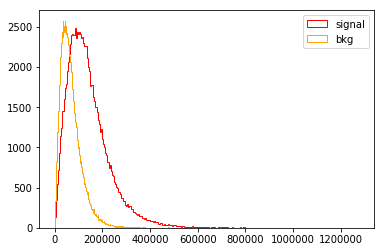

MT


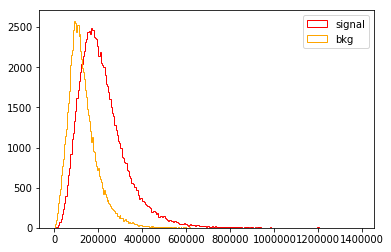

dR_lep_jet


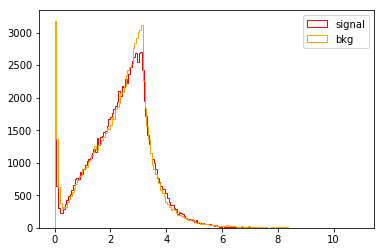

eta_lepton


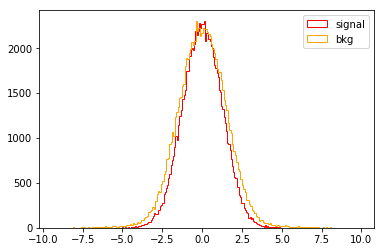

phi_lepton


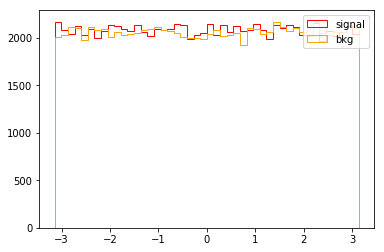

eta_leading_jet


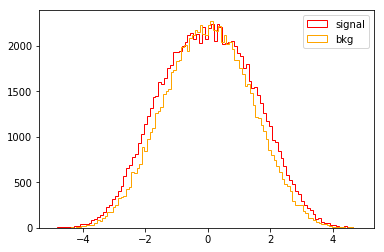

phi_leading_jet


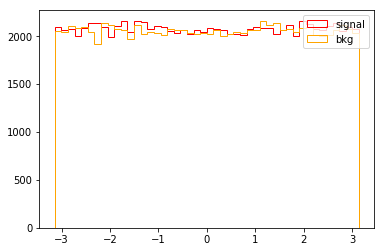

eta_subleading_jet


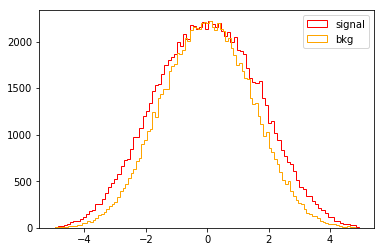

phi_subleading_jet


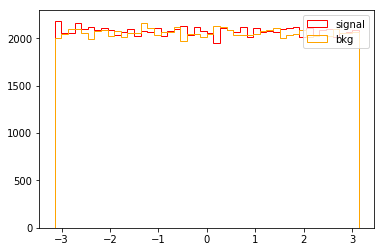

phi_met


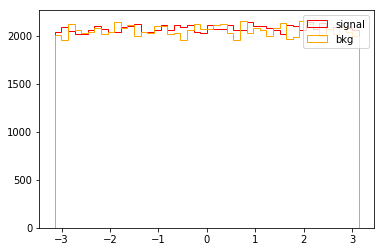

signal


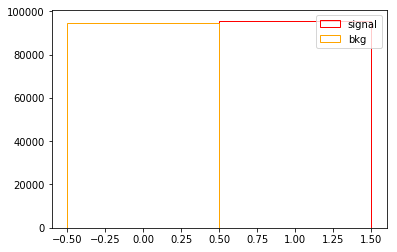

In [6]:
for var in df_sig.columns:
    print var
    plt.figure()
    plt.hist(df_sig[var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
    plt.hist(df_bkg[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

##Normalization 

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()

def normalize_stuff(n):
    return (n - n.min())/(n.max() - n.min())

In [8]:
series_list = []
 
for var in df_sig.columns:
    print var
    if var == "signal":
        series_list.append(df_sig[var])
        continue
    #print df_sig[var] 
    print df_sig[var].min()
    print df_sig[var].max()
    #print normalize_stuff(df_sig[var])
    print series_list.append((df_sig[var] - df_sig[var].min())/(df_sig[var].max() - df_sig[var].min()))




df_norm_sig = pd.DataFrame(series_list).T


lepton_pt
37.4979950259
533493.718477
None
pt_leading_jets
15646.403320299998
1444719.0
None
pt_second_jets
15001.151367200002
808295.8125
None
num_jet
2
17
None
Met1
293.988153653
1274824.2269700002
None
Met0
503.393336298
1276744.61532
None
MT
5862.15550761
1385089.12409
None
dR_lep_jet
8.64772478515e-05
9.37972375437
None
eta_lepton
-7.45194941343
6.980714514580001
None
phi_lepton
-3.14154592519
3.1415891880699998
None
eta_leading_jet
-4.83657121658
4.846353530880001
None
phi_leading_jet
-3.1415858268700005
3.1414656639099996
None
eta_subleading_jet
-4.96973466873
4.9473772049
None
phi_subleading_jet
-3.14158439636
3.14157128334
None
phi_met
-3.14155000962
3.14158185452
None
signal


In [9]:
series_list_bkg = []
for var in df_bkg.columns:
    print var
    if var == "signal":
        series_list_bkg.append(df_bkg[var])
        continue
    #print df_sig[var] 
    print df_bkg[var].min()
    print df_bkg[var].max()
    #print normalize_stuff(df_sig[var])
    print series_list_bkg.append((df_bkg[var] - df_bkg[var].min())/(df_bkg[var].max() - df_bkg[var].min()))

df_norm_bkg = pd.DataFrame(series_list_bkg).T

lepton_pt
2.80079536514
722787.8721970001
None
pt_leading_jets
15921.105468700001
1916895.625
None
pt_second_jets
15020.8662109
1297270.875
None
num_jet
2
17
None
Met1
321.268087025
909286.4549209999
None
Met0
116.127466236
664116.384082
None
MT
1548.44318284
1012139.8617799999
None
dR_lep_jet
0.0008246736903010002
10.9145661845
None
eta_lepton
-9.2549423152
9.85357508057
None
phi_lepton
-3.14138343113
3.14154787371
None
eta_leading_jet
-4.89853620529
4.821164608
None
phi_leading_jet
-3.1415820121799998
3.1415429115299998
None
eta_subleading_jet
-4.962626934049999
4.909536361690001
None
phi_subleading_jet
-3.14156126976
3.14142608643
None
phi_met
-3.14155494398
3.14142963027
None
signal


In [10]:
df_norm_bkg

,lepton_pt,pt_leading_jets,pt_second_jets,num_jet,Met1,Met0,MT,dR_lep_jet,eta_lepton,phi_lepton,eta_leading_jet,phi_leading_jet,eta_subleading_jet,phi_subleading_jet,phi_met,signal
0,0.083607,0.023504,0.015591,0.133333,0.138160,0.121286,0.138400,0.257327,0.491580,0.909986,0.587247,0.344148,0.720724,0.234922,0.755709,0.0
1,0.050044,0.032686,0.041752,0.133333,0.033038,0.016599,0.066806,0.216139,0.594190,0.955620,0.676253,0.325043,0.485508,0.719853,0.633780,0.0
2,0.002264,0.206847,0.132172,0.333333,0.292052,0.395168,0.260343,0.240896,0.524361,0.117542,0.530908,0.528406,0.589093,0.994398,0.053007,0.0
3,0.111470,0.080492,0.090739,0.200000,0.006157,0.003947,0.081368,0.064633,0.453557,0.850400,0.462600,0.741973,0.542577,0.212570,0.369363,0.0
4,0.159072,0.073732,0.075254,0.466667,0.035645,0.047612,0.174817,0.284246,0.404607,0.334502,0.398203,0.822054,0.420581,0.302024,0.409418,0.0
5,0.009302,0.031743,0.044236,0.333333,0.124561,0.152608,0.136909,0.285732,0.620398,0.355075,0.627190,0.798537,0.626233,0.057267,0.455550,0.0
6,0.102480,0.028385,0.036113,0.200000,0.071257,0.036525,0.096809,0.227340,0.501058,0.405416,0.792151,0.397053,0.469914,0.861537,0.104628,0.0
7,0.064879,0.036291,0.033861,0.200000,0.097369,0.108260,0.122999,0.231936,0.520748,0.680446,0.481032,0.304923,0.427512,0.061446,0.563420,0.0
8,0.069256,0.024945,0.024720,0.400000,0.018117,0.023492,0.067359,0.245795,0.525819,0.964750,0.377913,0.246234,0.264377,0.345270,0.452493,0.0
9,0.037718,0.029176,0.026936,0.200000,0.062167,0.102638,0.127914,0.180414,0.579205,0.235079,0.543643,0.019038,0.806729,0.969616,0.584307,0.0


lepton_pt


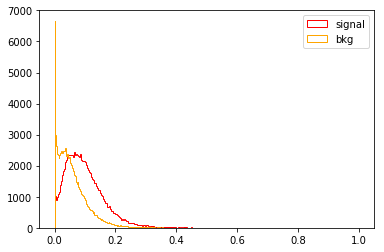

pt_leading_jets


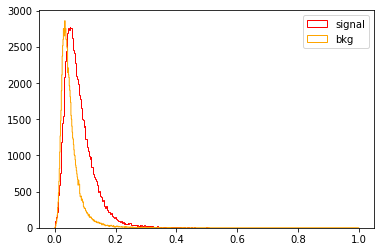

pt_second_jets


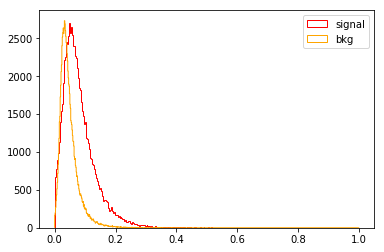

num_jet


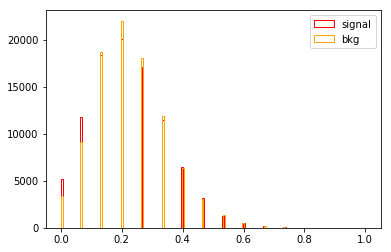

Met1


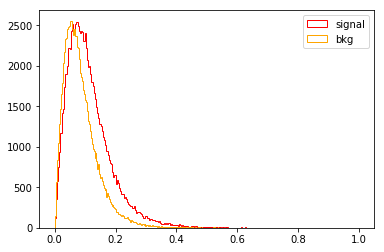

Met0


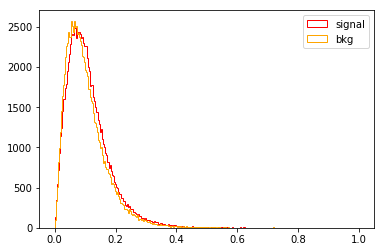

MT


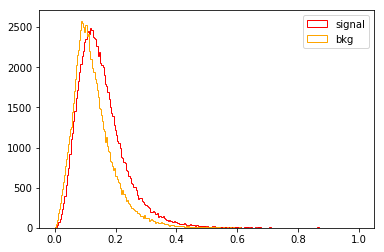

dR_lep_jet


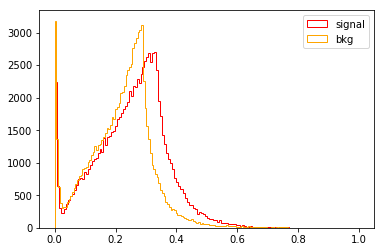

eta_lepton


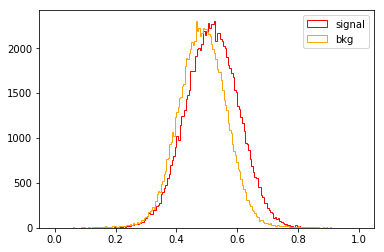

phi_lepton


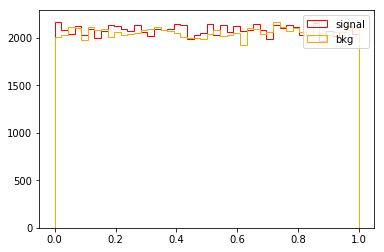

eta_leading_jet


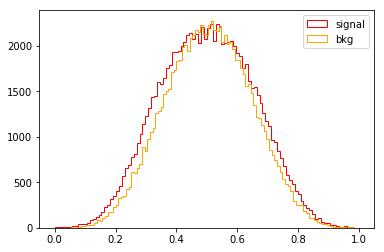

phi_leading_jet


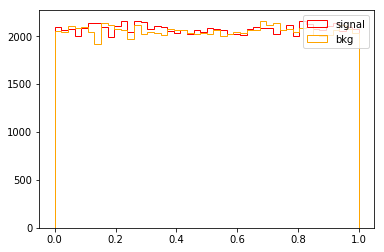

eta_subleading_jet


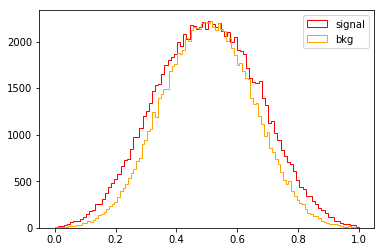

phi_subleading_jet


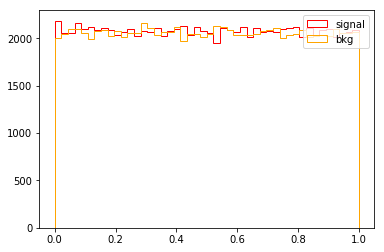

phi_met


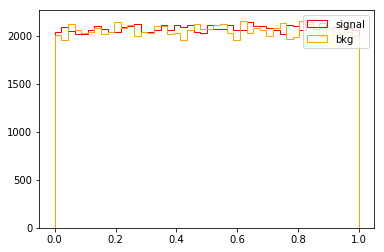

signal


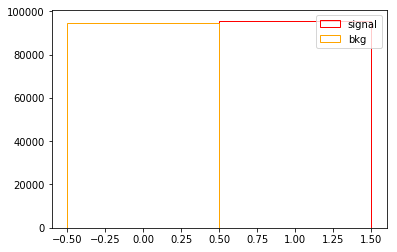

In [11]:
for var in df_sig.columns:
    print var
    plt.figure()
    plt.hist(df_norm_sig[var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
    plt.hist(df_norm_bkg[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

In [12]:
#using 80% of the data for training 
n_bkg = 94679*80/100
n_sig = 95623*80/100

df_train = pd.concat([df_norm_sig.iloc[:n_sig],df_norm_bkg.iloc[:n_bkg]])
df_test =  pd.concat([df_norm_sig.iloc[n_sig:],df_norm_bkg.iloc[n_bkg:]])

df_train = sklearn.utils.shuffle(df_train)
df_test = sklearn.utils.shuffle(df_test)



x_train = df_train[variable].reset_index(drop=True)
y_train = df_train["signal"].reset_index(drop=True)


x_test = df_test[variable].reset_index(drop=True)
y_test = df_test["signal"].reset_index(drop=True)


SyntaxError: invalid syntax (<ipython-input-107-3485c7cb62a9>, line 1)

lepton_pt


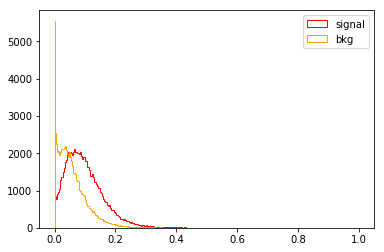

pt_leading_jets


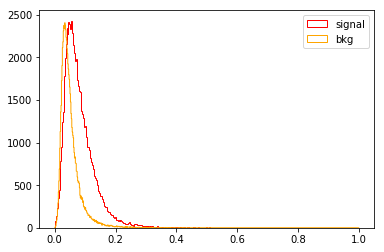

pt_second_jets


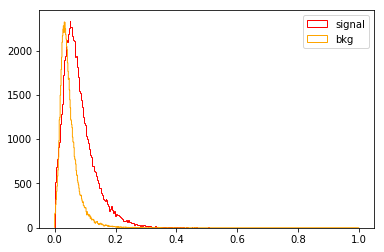

num_jet


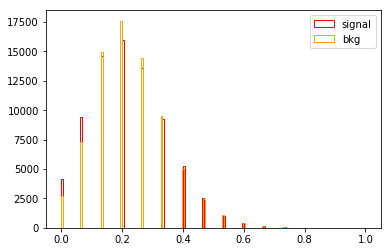

Met1


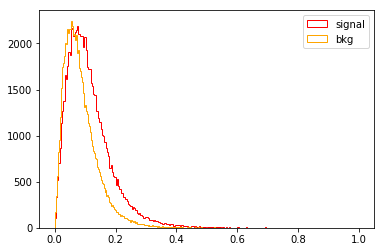

Met0


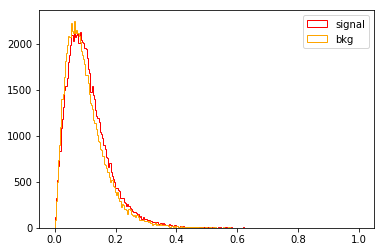

MT


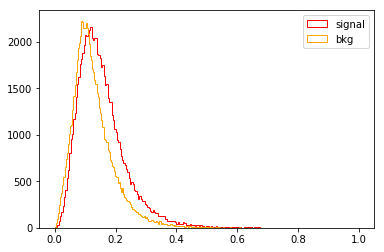

dR_lep_jet


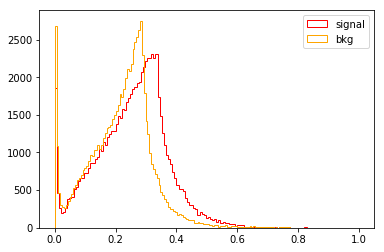

eta_lepton


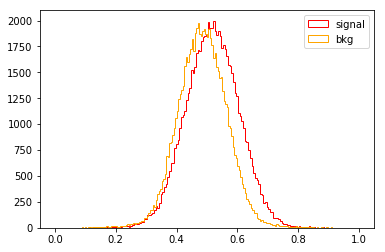

phi_lepton


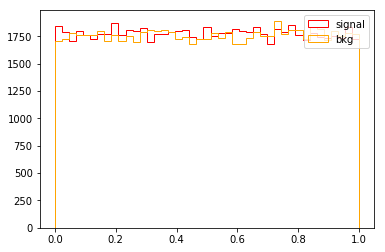

eta_leading_jet


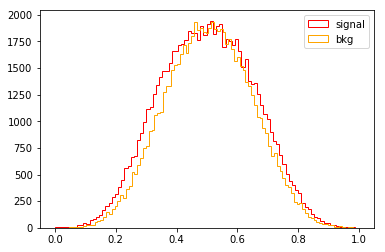

phi_leading_jet


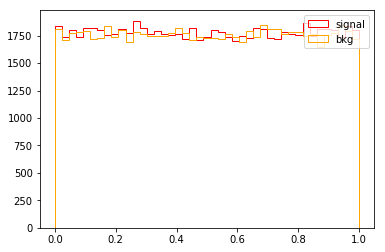

eta_subleading_jet


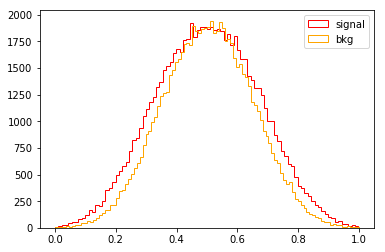

phi_subleading_jet


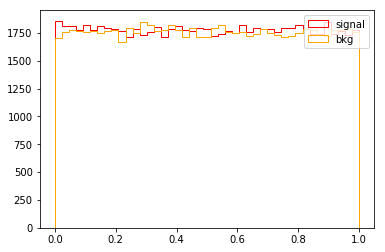

phi_met


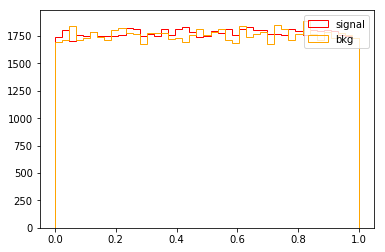

signal


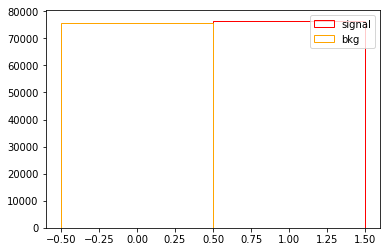

In [108]:
for var in df_train.columns:
    print var
    plt.figure()
    plt.hist(df_norm_sig.iloc[:n_sig][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
    plt.hist(df_norm_bkg.iloc[:n_bkg][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

lepton_pt


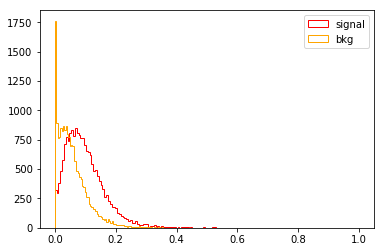

pt_leading_jets


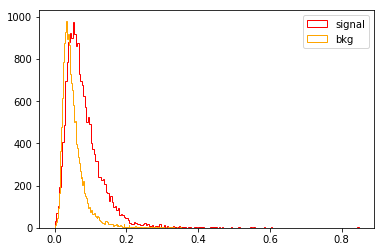

pt_second_jets


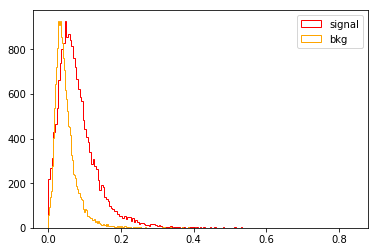

num_jet


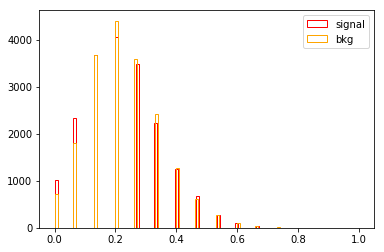

Met1


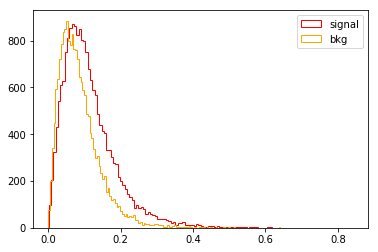

Met0


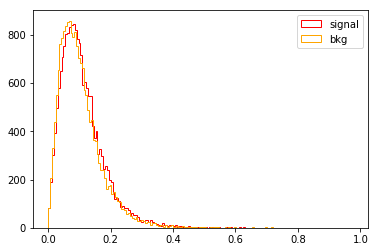

MT


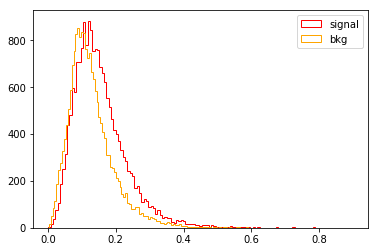

dR_lep_jet


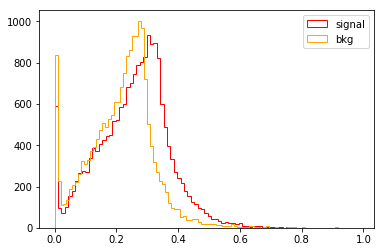

eta_lepton


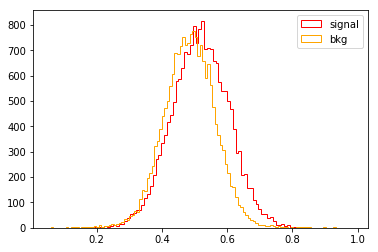

phi_lepton


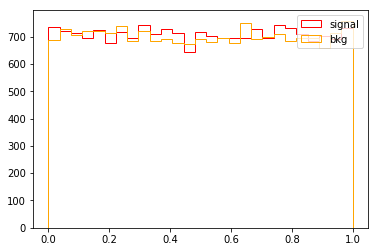

eta_leading_jet


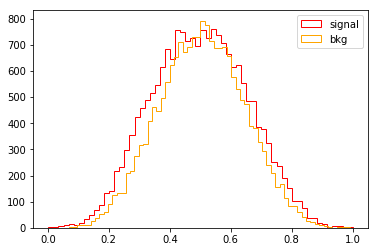

phi_leading_jet


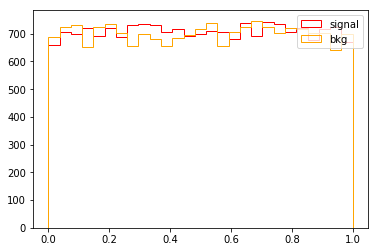

eta_subleading_jet


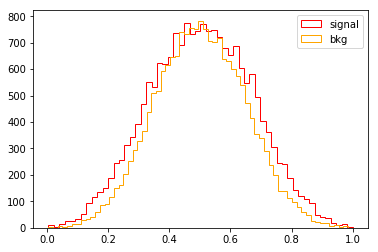

phi_subleading_jet


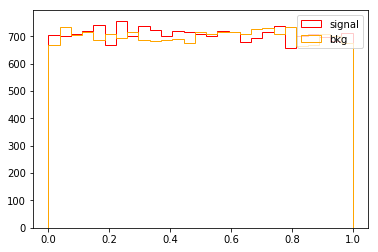

phi_met


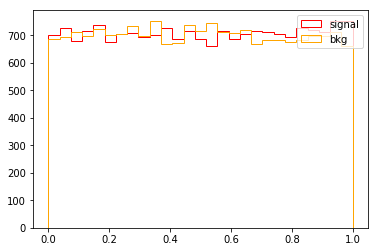

signal


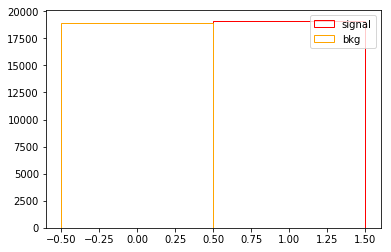

In [109]:
for var in df_train.columns:
    print var
    plt.figure()
    plt.hist(df_norm_sig.iloc[n_sig:][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
    plt.hist(df_norm_bkg.iloc[n_bkg:][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
    plt.legend(loc='upper right')
    plt.show()
    


In [13]:
print np.shape(x_train)
print np.shape(y_test)

(152241, 15)
(38061,)


In [14]:
x_train

,lepton_pt,pt_leading_jets,pt_second_jets,num_jet,Met1,Met0,MT,dR_lep_jet,eta_lepton,phi_lepton,eta_leading_jet,phi_leading_jet,eta_subleading_jet,phi_subleading_jet,phi_met
0,0.069273,0.088682,0.101073,0.533333,0.111208,0.105024,0.175068,0.447284,0.662598,0.352159,0.400794,0.896532,0.380341,0.318297,0.711674
1,0.274777,0.421181,0.462747,0.200000,0.295411,0.085512,0.253684,0.298482,0.501595,0.775654,0.359741,0.214938,0.440377,0.670729,0.801822
2,0.182698,0.085869,0.117478,0.266667,0.257952,0.185006,0.248258,0.293025,0.560407,0.760046,0.681849,0.158852,0.417939,0.349321,0.729474
3,0.132032,0.083877,0.126064,0.333333,0.115733,0.112027,0.157279,0.151272,0.474168,0.508116,0.292882,0.464452,0.454771,0.001210,0.901555
4,0.113398,0.111724,0.152925,0.466667,0.120660,0.121872,0.165973,0.306160,0.578811,0.688171,0.341993,0.932536,0.616823,0.360647,0.304139
5,0.021787,0.075564,0.037000,0.133333,0.074323,0.103330,0.138755,0.585107,0.335026,0.936947,0.698744,0.447585,0.233667,0.077236,0.008170
6,0.062841,0.065586,0.073294,0.066667,0.087987,0.118533,0.156559,0.325492,0.409088,0.321123,0.647623,0.216910,0.672931,0.517130,0.824873
7,0.069248,0.087510,0.103116,0.266667,0.034514,0.055901,0.085102,0.282404,0.476123,0.906360,0.467338,0.416725,0.506841,0.994428,0.832646
8,0.185704,0.065868,0.038971,0.066667,0.163005,0.063885,0.221197,0.274887,0.570709,0.615475,0.668631,0.137947,0.737456,0.853658,0.452911
9,0.085630,0.039155,0.070939,0.333333,0.054902,0.051272,0.092659,0.130710,0.603233,0.731215,0.558705,0.568953,0.405029,0.208649,0.844506


In [15]:
x_train.shape[1]

15

In [16]:
import os 
print "Using Queue:", os.environ["PBS_QUEUE"]
gpuid=int(os.environ["PBS_QUEUE"][3:4])
print "Using GPU:", gpuid
os.environ['THEANO_FLAGS'] = "device=cuda,floatX=float32,force_device=True" 



Using Queue: gpu7theco_ipynb
Using GPU: 7


In [17]:
import theano

Couldn't import dot_parser, loading of dot files will not be possible.


ERROR (theano.gpuarray): pygpu was configured but could not be imported or is too old (version 0.6 or higher required)
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gpuarray/__init__.py", line 21, in <module>
    import pygpu
  File "/home/bataju/.local/lib/python2.7/site-packages/pygpu-0.6.5-py2.7-linux-x86_64.egg/pygpu/__init__.py", line 7, in <module>
    from . import gpuarray, elemwise, reduction
ImportError: libgpuarray.so.2: cannot open shared object file: No such file or directory


In [18]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout


model = Sequential()
model.add(Dense(15, input_dim=x_train.shape[1], kernel_initializer="random_uniform", activation='tanh'))
model.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

Using Theano backend.
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
__________

In [20]:
history = model.fit(x_train.values,y_train.values,validation_data=(x_test.values,y_test.values), epochs=30, batch_size=128)

Train on 152241 samples, validate on 38061 samples
Epoch 1/30
152241/152241 [==============================] - 2s - loss: 0.5718 - acc: 0.7071 - val_loss: 0.5090 - val_acc: 0.7521
Epoch 2/30
152241/152241 [==============================] - 1s - loss: 0.5248 - acc: 0.7527 - val_loss: 0.4981 - val_acc: 0.7591
Epoch 3/30
152241/152241 [==============================] - 1s - loss: 0.5017 - acc: 0.7619 - val_loss: 0.4464 - val_acc: 0.7811
Epoch 4/30
152241/152241 [==============================] - 1s - loss: 0.4583 - acc: 0.7837 - val_loss: 0.4034 - val_acc: 0.8088
Epoch 5/30
152241/152241 [==============================] - 1s - loss: 0.4290 - acc: 0.7984 - val_loss: 0.3696 - val_acc: 0.8390
Epoch 6/30
152241/152241 [==============================] - 1s - loss: 0.3816 - acc: 0.8284 - val_loss: 0.3225 - val_acc: 0.8480
Epoch 7/30
152241/152241 [==============================] - 1s - loss: 0.3609 - acc: 0.8422 - val_loss: 0.3097 - val_acc: 0.8643
Epoch 8/30
152241/152241 [====================

In [21]:
print history.history

{'acc': [0.7071156915738472, 0.7527013091078014, 0.7619103920686747, 0.7836522355930867, 0.7984248658338027, 0.8284233550681296, 0.8421515886023951, 0.8450351744864177, 0.8524707536073751, 0.8576861686334635, 0.8629475634019796, 0.8673156376989584, 0.8697525633632643, 0.8733915305396974, 0.8770830459658966, 0.8772078480825822, 0.8789090980681072, 0.8824035575169659, 0.8826400246941597, 0.8851229300969783, 0.8854579252565782, 0.8861870324119686, 0.8870080990103225, 0.8882101405071805, 0.8916060719481845, 0.8949888663330112, 0.8953501356398106, 0.8971039338907624, 0.8967820757810755, 0.8988051838888159], 'loss': [0.5718126819704916, 0.52482281741404, 0.5017015688894219, 0.4583133401017757, 0.4290298618465667, 0.38158981911179574, 0.36085716297537057, 0.35342517546267627, 0.34160671991297503, 0.3308923930921637, 0.32130847393156, 0.3118546951093988, 0.30768885623170283, 0.3010095819262121, 0.2943493914368808, 0.2926392113439473, 0.2905277180590531, 0.2838261256233398, 0.2809502964225407, 

In [22]:
model.metrics_names
model.evaluate(x_test.values,y_test.values,batch_size=32)

36096/38061 [===========================>..] - ETA: 0s

[0.1701394816192694, 0.93368539975616]

In [23]:
y_predit = model.predict(x_test.values, batch_size=32)

signal to background prediction 

76498.0
19125.0


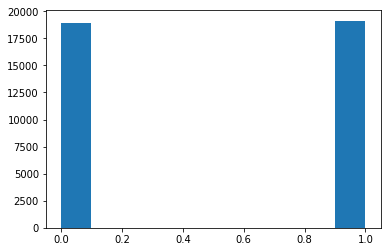

In [24]:
#this is the number of signal events in the training and test  dataset
print y_train.sum()
print y_test.sum()

plt.figure()
plt.hist(y_test)
plt.show()

[[0.99993247]
 [0.896456  ]
 [0.7800596 ]
 ...
 [0.04044586]
 [0.9760233 ]
 [0.8807363 ]]


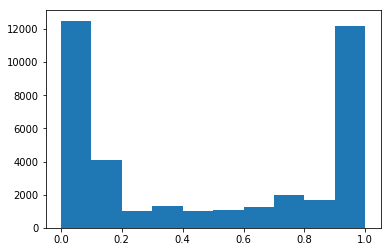

In [25]:
print y_predit


plt.figure()
plt.hist(y_predit)
plt.show()

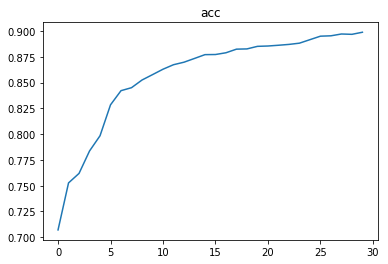

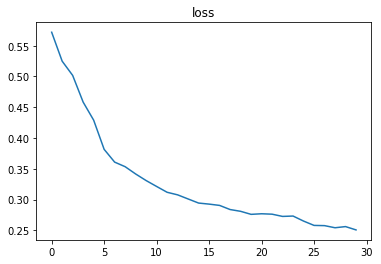

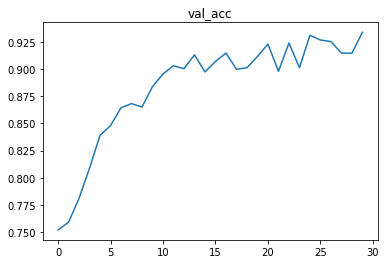

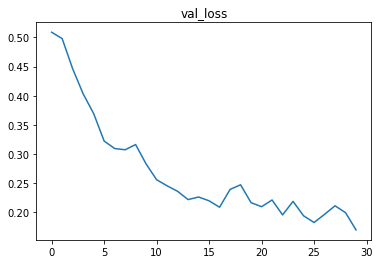

In [26]:
for u in history.history:
    plt.figure()
    plt.plot(history.history[u])
    plt.title(u)

In [27]:

from sklearn.metrics import auc
from sklearn.metrics import roc_curve


y_predit = model.predict(x_test.values).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_predit)


auc_model = auc(fpr_keras, tpr_keras)

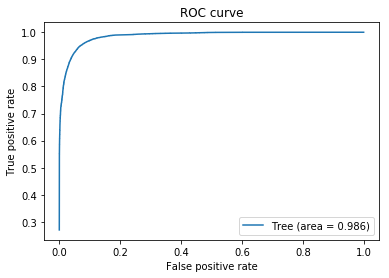

In [100]:
plt.figure()

plt.plot(fpr_keras, tpr_keras, label='Tree (area = {:.3f})'.format(auc_model))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [90]:
test_file = 'sig1600randseed.csv'
test_data = pd.read_csv(test_file,index_col=0)
test_array = test_data[variable].reset_index(drop=True)
test_array["signal"] = 1



In [88]:
test_array.columns

Index([u'lepton_pt', u'pt_leading_jets', u'pt_second_jets', u'num_jet',
       u'Met1', u'Met0', u'MT', u'dR_lep_jet', u'eta_lepton', u'phi_lepton',
       u'eta_leading_jet', u'phi_leading_jet', u'eta_subleading_jet',
       u'phi_subleading_jet', u'phi_met', u'signal'],
      dtype='object')

In [95]:
series_list_test = []
 
for var in test_array.columns:
    print var
    if var == "signal":
        series_list_test.append(test_array[var])
        continue
    #print df_sig[var] 
    #print test_data[var].min()
    #print test_data[var].max()
    #print normalize_stuff(df_sig[var])
    series_list_test.append((test_array[var] - test_array[var].min())/(test_array[var].max() - test_array[var].min()))

df_norm_bkg_test = df_norm_bkg[:len(test_array)]
df_norm_sig_test = pd.DataFrame(series_list_test).T


df_norm_test = pd.concat([df_norm_sig_test,df_norm_bkg_test])
df_norm_test=sklearn.utils.shuffle(df_norm_test)

df_norm_x_test = df_norm_test[variable].reset_index(drop=True)
df_norm_y_test = df_norm_test["signal"].reset_index(drop=True)

lepton_pt
pt_leading_jets
pt_second_jets
num_jet
Met1
Met0
MT
dR_lep_jet
eta_lepton
phi_lepton
eta_leading_jet
phi_leading_jet
eta_subleading_jet
phi_subleading_jet
phi_met
signal


In [96]:
df_norm_y_test

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
5       1.0
6       0.0
7       1.0
8       1.0
9       1.0
10      0.0
11      0.0
12      1.0
13      1.0
14      1.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      1.0
23      0.0
24      1.0
25      0.0
26      1.0
27      0.0
28      0.0
29      1.0
       ... 
9550    1.0
9551    1.0
9552    0.0
9553    1.0
9554    0.0
9555    1.0
9556    1.0
9557    0.0
9558    0.0
9559    0.0
9560    1.0
9561    1.0
9562    0.0
9563    1.0
9564    0.0
9565    0.0
9566    0.0
9567    0.0
9568    0.0
9569    0.0
9570    0.0
9571    1.0
9572    1.0
9573    0.0
9574    0.0
9575    1.0
9576    0.0
9577    1.0
9578    0.0
9579    1.0
Name: signal, dtype: float64

0.8851912256309901


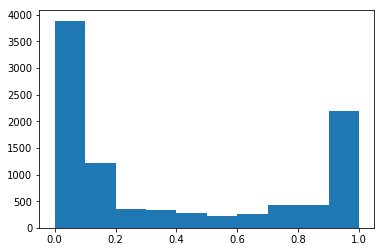

In [98]:
test_predict = model.predict(df_norm_x_test.values).ravel()
fpr_, tpr_, thresholds_ = roc_curve(df_norm_y_test, test_predict)
auc_test = auc(fpr_, tpr_)
print auc_test
plt.figure()
plt.hist(test_predict)
plt.show()

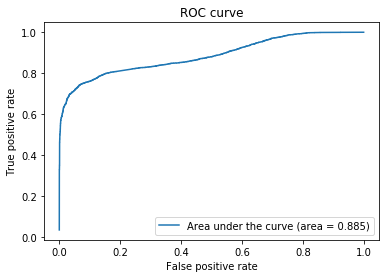

In [99]:
plt.figure()

plt.plot(fpr_, tpr_, label='Area under the curve (area = {:.3f})'.format(auc_test))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

#Decision Tree

In [34]:
from sklearn import tree

n_bkg = 94679*80/100
n_sig = 95623*80/100

df_train = pd.concat([df_sig.iloc[:n_sig],df_bkg.iloc[:n_bkg]])
df_test =  pd.concat([df_sig.iloc[n_sig:],df_bkg.iloc[n_bkg:]])

df_train = sklearn.utils.shuffle(df_train)
df_test = sklearn.utils.shuffle(df_test)



x_train = df_train[variable].reset_index(drop=True)
y_train = df_train["signal"].reset_index(drop=True)


x_test = df_test[variable].reset_index(drop=True)
y_test = df_test["signal"].reset_index(drop=True)

In [35]:
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_train,y_train)

In [36]:

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
y_predict_tree = tree_model.predict(x_test)
fpr,tpr,t = roc_curve(y_test,y_predict_tree)
auc_tree = auc(fpr,tpr)



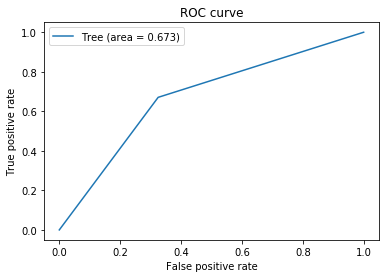

In [37]:
plt.figure()

plt.plot(fpr, tpr, label='Tree (area = {:.3f})'.format(auc_tree))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [38]:
#from https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting
from sklearn.ensemble import GradientBoostingClassifier

GDC = GradientBoostingClassifier(n_estimators=500, learning_rate=0.6,
                                 max_depth=5, random_state=0).fit(x_train, y_train)
GDC.score(x_test,y_test)


0.7445942040408817

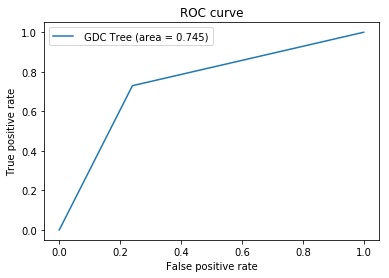

In [39]:
y_predict_gdc = GDC.predict(x_test)
fpr_gdc,tpr_gdc,t = roc_curve(y_test,y_predict_gdc)
auc_gdc = auc(fpr_gdc,tpr_gdc)

plt.figure()

plt.plot(fpr_gdc, tpr_gdc, label=' GDC Tree (area = {:.3f})'.format(auc_gdc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [40]:
from sklearn.ensemble import ExtraTreesClassifier 

tree_2 = ExtraTreesClassifier(verbose=1,n_estimators=50)

In [41]:
tree_2.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.5s finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [42]:
tree_2.score(x_test,y_test)

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished


0.7585980399884397

trying with a shallow network

In [43]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout


model1 = Sequential()
model1.add(Dense(15, input_dim=x_train.shape[1], kernel_initializer="random_uniform", activation='tanh'))
model1.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model1.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [44]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [45]:
history1 = model1.fit(x_train.values,y_train.values,validation_data=(x_test.values,y_test.values), epochs=50, batch_size=32)

Train on 152241 samples, validate on 38061 samples
Epoch 1/50
152241/152241 [==============================] - 2s - loss: 0.6753 - acc: 0.5449 - val_loss: 0.6928 - val_acc: 0.4975
Epoch 2/50
152241/152241 [==============================] - 1s - loss: 0.6935 - acc: 0.5013 - val_loss: 0.6928 - val_acc: 0.4975
Epoch 3/50
152241/152241 [==============================] - 2s - loss: 0.6921 - acc: 0.5015 - val_loss: 0.6893 - val_acc: 0.5098
Epoch 4/50
152241/152241 [==============================] - 2s - loss: 0.6855 - acc: 0.5286 - val_loss: 0.6934 - val_acc: 0.4977
Epoch 5/50
152241/152241 [==============================] - 2s - loss: 0.6933 - acc: 0.5013 - val_loss: 0.6947 - val_acc: 0.5027
Epoch 6/50
152241/152241 [==============================] - 2s - loss: 0.6933 - acc: 0.5005 - val_loss: 0.6940 - val_acc: 0.5027
Epoch 7/50
152241/152241 [==============================] - 2s - loss: 0.6933 - acc: 0.5009 - val_loss: 0.6931 - val_acc: 0.5027
Epoch 8/50
152241/152241 [====================

In [46]:
model1.metrics_names
model1.evaluate(x_test.values,y_test.values,batch_size=32)

36960/38061 [============================>.] - ETA: 0s

[0.6930642947916733, 0.49751714353353305]

In [47]:
y_predit1 = model1.predict(x_test.values, batch_size=32)

[[0.49921107]
 [0.49921107]
 [0.49921107]
 ...
 [0.49921107]
 [0.49921107]
 [0.49921107]]


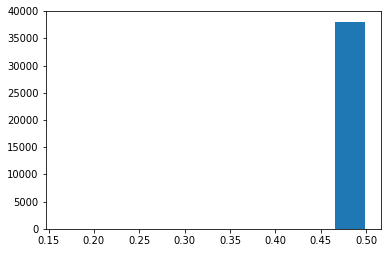

In [48]:
print y_predit1


plt.figure()
plt.hist(y_predit1)
plt.show()

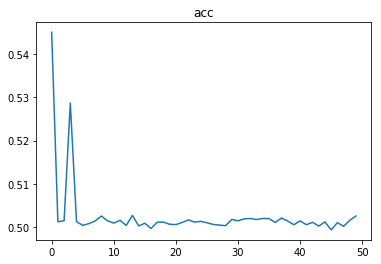

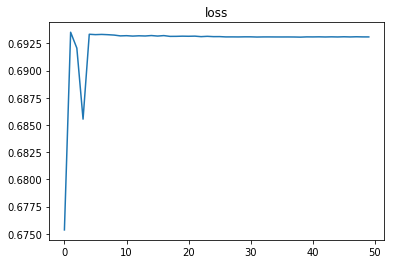

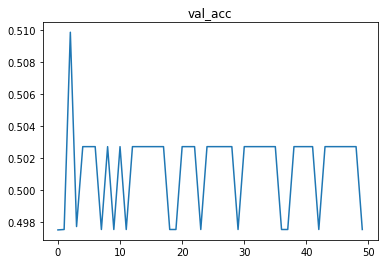

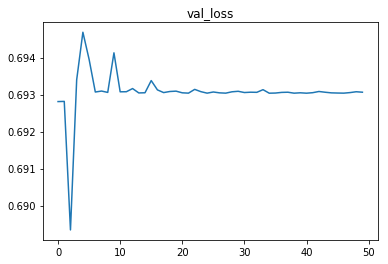

In [49]:
for u in history1.history:
    plt.figure()
    plt.plot(history1.history[u])
    plt.title(u)

In [50]:

from sklearn.metrics import auc
from sklearn.metrics import roc_curve


fpr_1, tpr_1, thresholds_keras = roc_curve(y_test, y_predit1)


auc_model1 = auc(fpr_1, tpr_1)

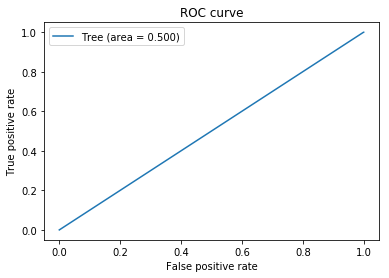

In [51]:
plt.figure()

plt.plot(fpr_1, tpr_1, label='Tree (area = {:.3f})'.format(auc_model1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# #Stochastiv Gradient Decent

In [52]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge")
clf.fit(x_train,y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [53]:
plt.hist(clf.decision_function(x_test[x_test.signal == 1]),bins='auto')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'signal'

In [ ]:

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
y_predit1 = clf.predict(x_test)

fpr_1, tpr_1, thresholds_keras = roc_curve(y_test, y_predit1)


auc_model1 = auc(fpr_1, tpr_1)
plt.figure()

plt.plot(fpr_1, tpr_1, label='Tree (area = {:.3f})'.format(auc_model1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()